In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 【問題1】ブレンディングのスクラッチ実装

In [2]:
# trainデータを読み込む
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
X = df[['GrLivArea', 'YearBuilt']]
X.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


In [4]:
y = df['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [5]:
print(X.describe())

         GrLivArea    YearBuilt
count  1460.000000  1460.000000
mean   1515.463699  1971.267808
std     525.480383    30.202904
min     334.000000  1872.000000
25%    1129.500000  1954.000000
50%    1464.000000  1973.000000
75%    1776.750000  2000.000000
max    5642.000000  2010.000000


In [6]:
X = X.values
y = y.values

In [7]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [8]:
#　訓練データと検証データに分割
from sklearn.model_selection import train_test_split

# 訓練データ80%、検証データ20%として分割
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 0)

# ① MSEを計算する関数

In [9]:
#  平均二乗誤差（Mean Squared Error, MSE）
from sklearn.metrics import mean_squared_error

def calc_mse(y, y_pred):
    mse = mean_squared_error(y, y_pred)
    return mse

# ② 各モデルの関数

## 線形回帰モデル（LinearRegression）

In [10]:
from sklearn.linear_model import LinearRegression

def clac_LinearRegression(X_train, X_val, y_train, y_val):
    
    clf = LinearRegression()
    clf.fit(X_train, y_train) # 学習
    y_pred = clf.predict(X_val) # 予測
    mse = calc_mse(y_val, y_pred) # 評価（MSE）
    
    return y_pred, mse

## SVMモデル（SVC）

In [11]:
from sklearn.svm import SVC

def calc_SVC(X_train, X_val, y_train, y_val):

    clf = SVC(kernel="linear") # SVMのインスタンスを生成
    clf.fit(X_train, y_train) # 学習
    y_pred = clf.predict(X_val) # 予測
    mse = calc_mse(y_val, y_pred) # 評価（MSE）
    
    return y_pred, mse

## 決定木モデル（DecisionTreeRegressor）

In [12]:
from sklearn.tree import DecisionTreeRegressor

def calc_DecisionTree(X_train, X_val, y_train, y_val):

    clf = DecisionTreeRegressor(max_depth = 3)
    clf.fit(X_train, y_train) # 学習
    y_pred = clf.predict(X_val) # 予測
    mse = calc_mse(y_val, y_pred) # 評価（MSE）
    
    return y_pred, mse   

In [13]:
y_pred, mse  = calc_DecisionTree(X_train, X_val, y_train, y_val)

# ③ ブレンディングのスクラッチ

In [14]:
def blending_model(models, X_train, X_val, y_train, y_val):
    
    tmp = None
    
    for model in models:
        
        if  model == 'LinearRegression':
            y_pred, mse = clac_LinearRegression(X_train, X_val, y_train, y_val)
            
        elif  model == 'SVC':
            y_pred, mse = calc_SVC(X_train, X_val, y_train, y_val)
            
        elif  model == 'DecisionTree':
            y_pred, mse = calc_DecisionTree(X_train, X_val, y_train, y_val)            
            
        if tmp is None:
            tmp = y_pred.reshape(-1, 1)
        else:
            tmp = np.concatenate([tmp, y_pred.reshape(-1, 1)], axis=1)
            
    y_pred = np.mean(tmp, axis=1)
    mse = calc_mse(y_val, y_pred) # 評価（MSE）
            
    return y_pred, mse

In [15]:
y_pred, mse = blending_model(['LinearRegression', 'SVC','DecisionTree'], X_train, X_val, y_train, y_val)

# ④ 検証

In [16]:
def view_result(X, y, y_pred, mse):
    
    #1行 × 2列のグラフを設定
    row = 1
    col  = 2

    plt.figure(figsize=(12, 6), dpi = 80)

    # 縦軸「GrLivArea」　横軸「SalePrice」
    plt.subplot(row, col, 1)
    plt.xlabel('GrLivArea')
    plt.ylabel('SalePrice')
    plt.scatter(X[:, 0], y_pred, s=10, c='magenta', alpha=0.6, label='y_perd')
    plt.scatter(X[:, 0], y, s=10, alpha=0.6, label='y')
    plt.legend(loc='upper left')

    # 縦軸「YearBuilt」　横軸「SalePrice」
    plt.subplot(row, col, 2)
    plt.xlabel('YearBuilt')
    plt.ylabel('SalePrice')
    plt.scatter(X[:, 1], y_pred, s=10, c='magenta', alpha=0.6, label='y_perd')
    plt.scatter(X[:, 1], y, s=10, alpha=0.6, label='y')
    plt.legend(loc='upper left')
    
    print("平均二乗誤差（Mean Squared Error, MSE）: {}".format(mse))

## 線形回帰モデル（LinearRegression）の単体

In [17]:
y_pred, mse = clac_LinearRegression(X_train, X_val, y_train, y_val)
result = pd.DataFrame([["線形回帰",mse]], columns=['Model','MSE'])

平均二乗誤差（Mean Squared Error, MSE）: 2942066921.672107


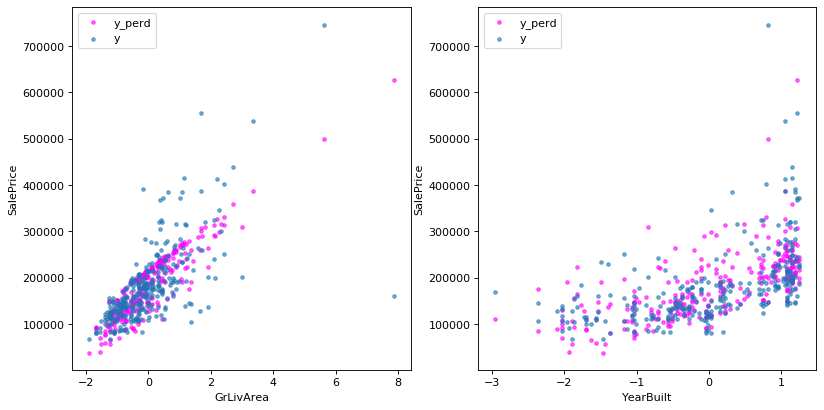

In [18]:
view_result(X_val, y_val, y_pred, mse)

## SVMモデル（SVC）の単体

In [19]:
y_pred, mse = calc_SVC(X_train, X_val, y_train, y_val)
result = pd.concat([result, pd.DataFrame([["SVM",mse]], columns=['Model','MSE'])])

平均二乗誤差（Mean Squared Error, MSE）: 2453672272.9863014


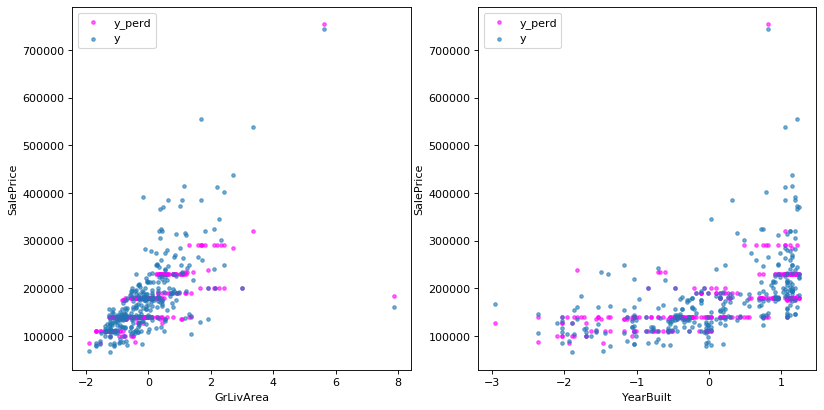

In [20]:
view_result(X_val, y_val, y_pred, mse)

## 決定木モデル（DecisionTreeRegressor）の単体

In [21]:
y_pred, mse = calc_DecisionTree(X_train, X_val, y_train, y_val)
result = pd.concat([result, pd.DataFrame([["決定木",mse]], columns=['Model','MSE'])])

平均二乗誤差（Mean Squared Error, MSE）: 2695315830.674088


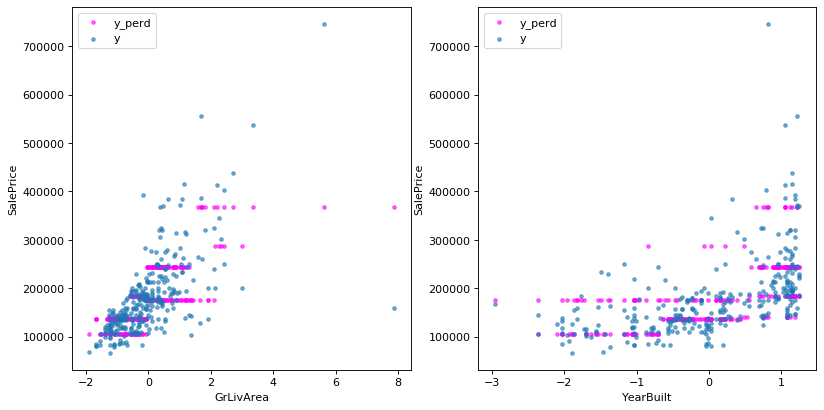

In [22]:
view_result(X_val, y_val, y_pred, mse)

## 線形回帰モデル と SVMモデル

In [23]:
y_pred, mse = blending_model(['LinearRegression', 'SVC'], X_train, X_val, y_train, y_val)
result = pd.concat([result, pd.DataFrame([["線形回帰 SVM",mse]], columns=['Model','MSE'])])

平均二乗誤差（Mean Squared Error, MSE）: 2265945187.885832


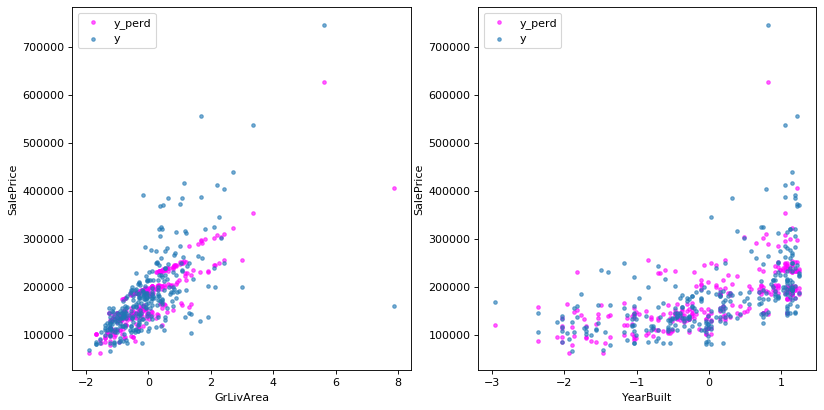

In [24]:
view_result(X_val, y_val, y_pred, mse)

## 線形回帰モデル と 決定木モデル

In [25]:
y_pred, mse = blending_model(['LinearRegression', 'DecisionTree'], X_train, X_val, y_train, y_val)
result = pd.concat([result, pd.DataFrame([["線形回帰 決定木",mse]], columns=['Model','MSE'])])

平均二乗誤差（Mean Squared Error, MSE）: 2537034970.345986


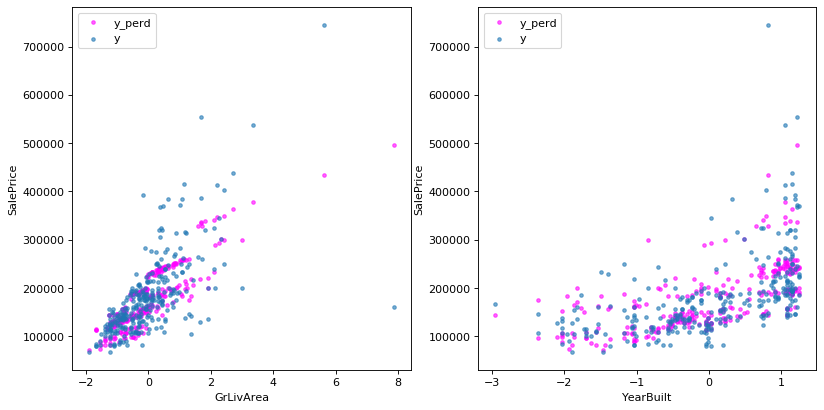

In [26]:
view_result(X_val, y_val, y_pred, mse)

## SVMモデル と 決定木モデル

In [27]:
y_pred, mse = blending_model(['SVC', 'DecisionTree'], X_train, X_val, y_train, y_val)
result = pd.concat([result, pd.DataFrame([["SVM 決定木",mse]], columns=['Model','MSE'])])

平均二乗誤差（Mean Squared Error, MSE）: 2177712526.4913483


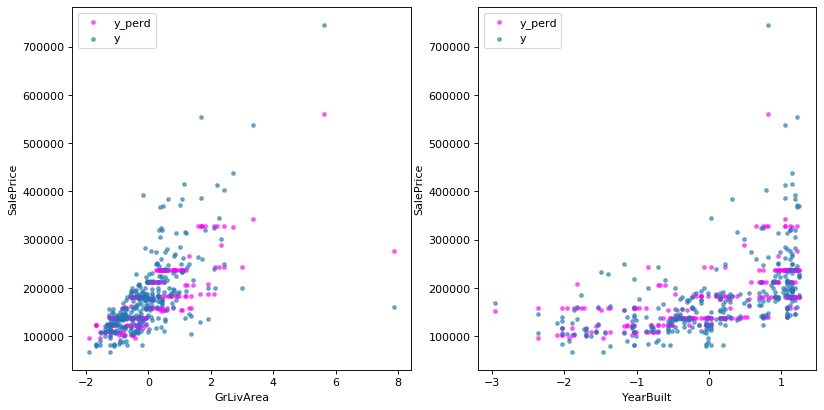

In [28]:
view_result(X_val, y_val, y_pred, mse)

## 線形回帰モデル と SVMモデル と 決定木モデル

In [29]:
y_pred, mse = blending_model(['LinearRegression', 'SVC','DecisionTree'], X_train, X_val, y_train, y_val)
result = pd.concat([result, pd.DataFrame([["線形回帰 SVM 決定木",mse]], columns=['Model','MSE'])])

平均二乗誤差（Mean Squared Error, MSE）: 2203523968.173352


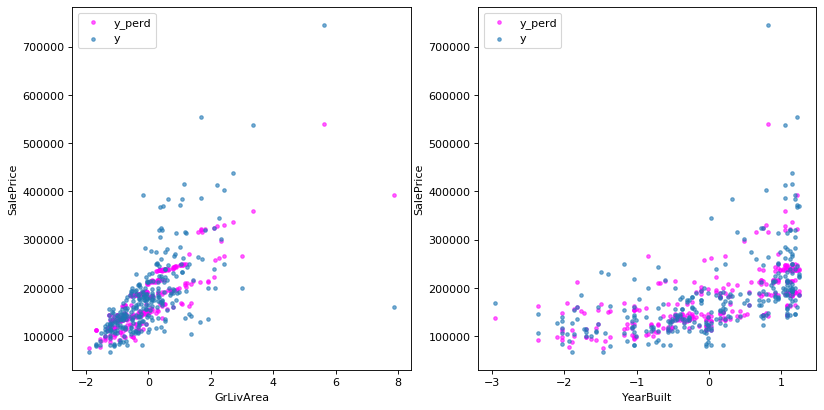

In [30]:
view_result(X_val, y_val, y_pred, mse)

## 単一モデルより精度があがる例は以下の通り
### ① 「SVM」「決定木」
### ② 「線形回帰」「SVM」「決定木」
### ③ 「線形回帰」「SVM」

In [31]:
result.sort_values('MSE')

,Model,MSE
0,SVM 決定木,2.177713e+09
0,線形回帰 SVM 決定木,2.203524e+09
0,線形回帰 SVM,2.265945e+09
0,SVM,2.453672e+09
0,線形回帰 決定木,2.537035e+09
0,決定木,2.695316e+09
0,線形回帰,2.942067e+09


# 【問題2】バギングのスクラッチ実装

# ① バギングのスクラッチ

In [32]:
def bagging_model(model, n_times, X_train, X_test, y_train, y_test):
    
    tmp = None

    for _ in range(n_times):
        
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state = 0, shuffle = True)
    
        if  model == 'LinearRegression':
            y_pred, mse = clac_LinearRegression(X_train, X_test, y_train, y_test)
            
        elif  model == 'SVC':
            y_pred, mse = calc_SVC(X_train, X_test, y_train, y_test)
            
        elif  model == 'DecisionTree':
            y_pred, mse = calc_DecisionTree(X_train, X_test, y_train, y_test)
            
        if tmp is None:
            tmp = y_pred.reshape(-1, 1)
        else:
            tmp = np.concatenate([tmp, y_pred.reshape(-1, 1)], axis=1)
            
    y_pred = np.mean(tmp, axis=1)
    mse = calc_mse(y_test, y_pred) # 評価（MSE）
            
    return y_pred, mse

# ② 検証

## 線形回帰モデル（LinearRegression）の単体

In [33]:
y_pred, mse = clac_LinearRegression(X_train, X_val, y_train, y_val)
result2 = pd.DataFrame([["線形回帰",mse]], columns=['Model','MSE'])

平均二乗誤差（Mean Squared Error, MSE）: 2942066921.672107


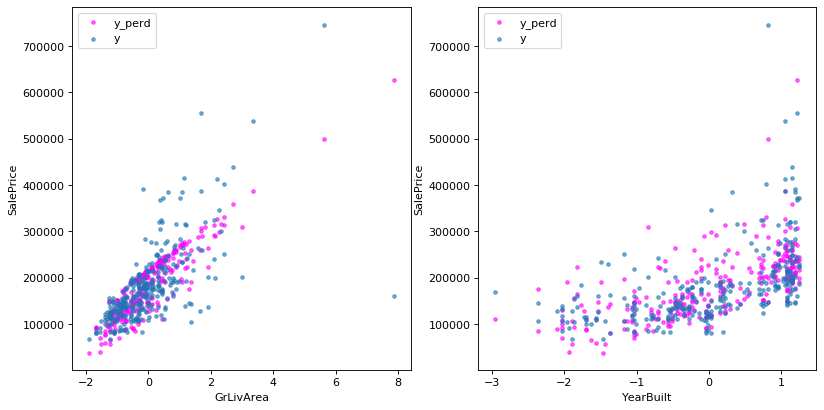

In [34]:
view_result(X_val, y_val, y_pred, mse)

## SVMモデル（SVC）の単体

In [35]:
y_pred, mse = calc_SVC(X_train, X_val, y_train, y_val)
result2 = pd.concat([result2, pd.DataFrame([["SVM",mse]], columns=['Model','MSE'])])

平均二乗誤差（Mean Squared Error, MSE）: 2453672272.9863014


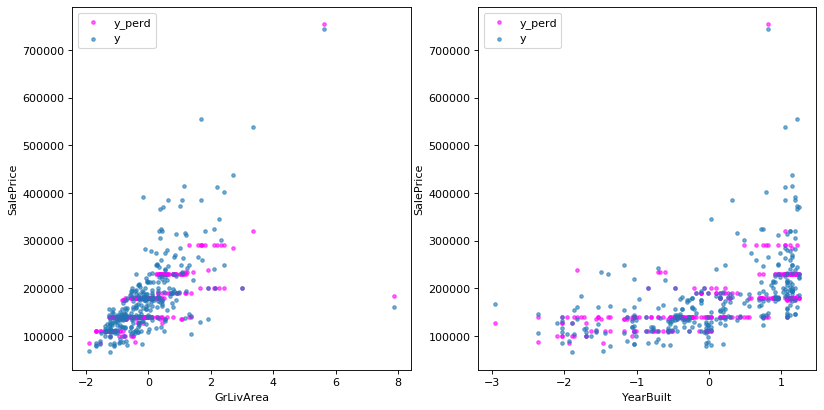

In [36]:
view_result(X_val, y_val, y_pred, mse)

## 決定木モデル（DecisionTreeRegressor）の単体

In [37]:
y_pred, mse = calc_DecisionTree(X_train, X_val, y_train, y_val)
result2 = pd.concat([result2, pd.DataFrame([["決定木",mse]], columns=['Model','MSE'])])

平均二乗誤差（Mean Squared Error, MSE）: 2695315830.674088


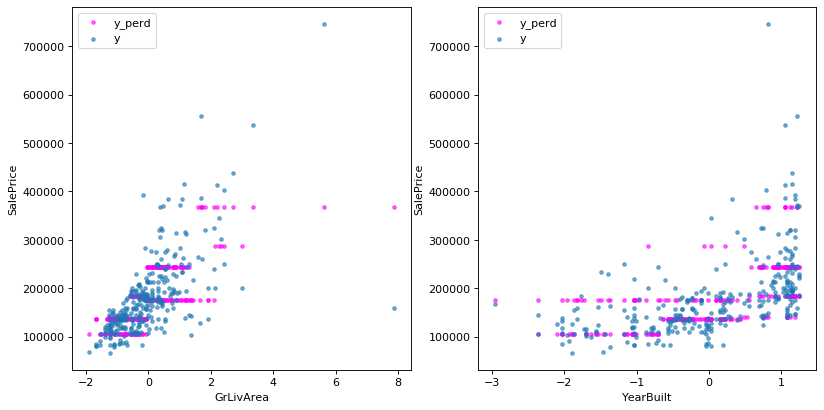

In [38]:
view_result(X_val, y_val, y_pred, mse)

## 線形回帰モデル（LinearRegression）のバギング（試行回数：10回）

In [39]:
y_pred, mse = bagging_model('LinearRegression', 10, X_train, X_val, y_train, y_val)
result2 = pd.concat([result2, pd.DataFrame([["線形回帰(バギング：１０回)",mse]], columns=['Model','MSE'])])

平均二乗誤差（Mean Squared Error, MSE）: 2938526949.1882443


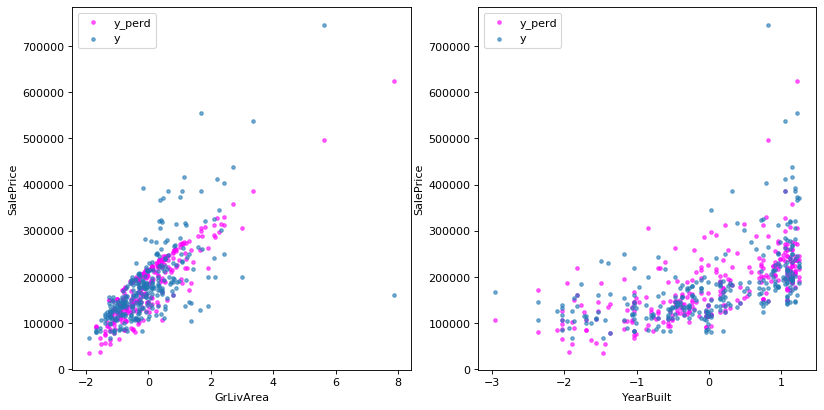

In [40]:
view_result(X_val, y_val, y_pred, mse)

## SVMモデル（SVC）のバギング（試行回数：10回）

In [41]:
y_pred, mse = bagging_model('SVC', 10, X_train, X_val, y_train, y_val)
result2 = pd.concat([result2, pd.DataFrame([["SVM(バギング：１０回)",mse]], columns=['Model','MSE'])])

平均二乗誤差（Mean Squared Error, MSE）: 3061744067.136096


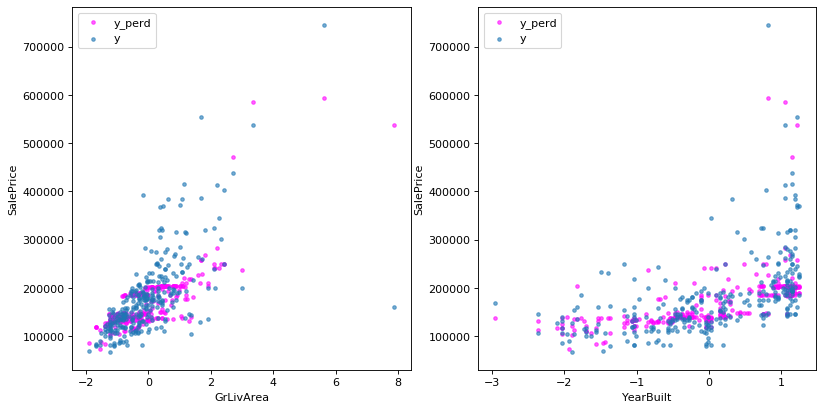

In [42]:
view_result(X_val, y_val, y_pred, mse)

## 決定木モデル（DecisionTreeRegressor）のバギング（試行回数：10回）

In [43]:
y_pred, mse = bagging_model('DecisionTree', 10, X_train, X_val, y_train, y_val)
result2 = pd.concat([result2, pd.DataFrame([["決定木(バギング：１０回)",mse]], columns=['Model','MSE'])])

平均二乗誤差（Mean Squared Error, MSE）: 2569798563.000047


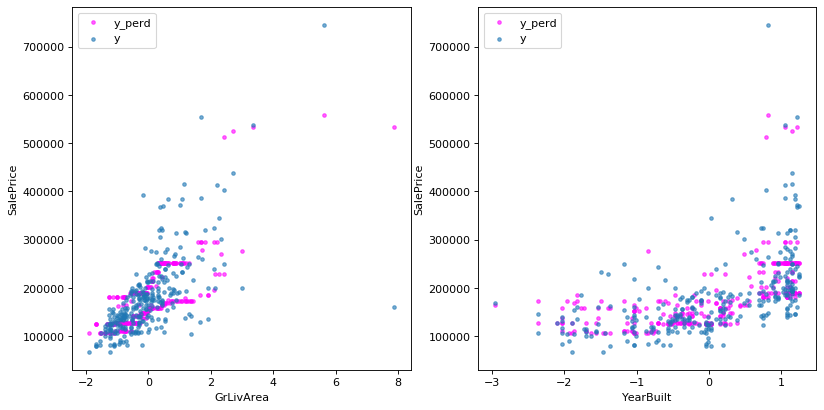

In [44]:
view_result(X_val, y_val, y_pred, mse)

## バギングしたときに単一モデルより少し精度があがった例は以下の通り
### ① 「決定木」
### ② 「線形回帰」
## 「SVM」はバギングすると単一モデルよりも精度が下がる

In [45]:
result2.sort_values('MSE')

,Model,MSE
0,SVM,2.453672e+09
0,決定木(バギング：１０回),2.569799e+09
0,決定木,2.695316e+09
0,線形回帰(バギング：１０回),2.938527e+09
0,線形回帰,2.942067e+09
0,SVM(バギング：１０回),3.061744e+09


# 【問題3】スタッキングのスクラッチ実装

In [46]:
class stacking_model():
    
    def __init__(self, models, second_model, n_split=10):
        
        self.models = models # 最初に学習に使用するモデル
        self.second_model = second_model # 最後に学習に使用するモデル
        self.n_split = int(n_split)    # データの分割数
        
        self.stage0_models = None
        self.stage0_predicts = None
        self.stage0_y_val = None
        self.stage1_models = None
        self.stage1_predicts = None
        self.stage1_y_val = None        
        self.stage2_model = None
        
        
    def fit(self, X, y):
        
        print(X.shape)
        print(y.reshape(-1,1).shape)
        
        
        # ステージ 0
        self.stage0_models, self.stage0_predicts, self.stage0_y_val = self.calc_stage(X, y.reshape(-1,1))
        
        print(self.stage0_predicts.shape)
        print(self.stage0_y_val.shape)        
        
        # ステージ 1
        self.stage1_models, self.stage1_predicts, self.stage1_y_val = self.calc_stage(self.stage0_predicts, self.stage0_y_val)        
        
        
#         # ステージ 0
#         Xy = np.concatenate([X,y.reshape(-1,1)],axis=1) # Xとyを連結する
#         np.random.shuffle(Xy) # 配列の行をシャッフルする
#         split_idx = np.arange(Xy.shape[0]) // int(Xy.shape[0] / self.n_split)
#         # データの分割数に応じてインデックスを作成
        
#         for i in range(self.n_split):

#             Xy_train = Xy[split_idx != i]
#             Xy_val = Xy[split_idx == i]

#             X_train = Xy_train[:, :-2]
#             y_train = Xy_train[:, -1]
#             X_val = Xy_val[:, :-2]
#             y_val = Xy_val[:, -1]
            
#             models_buf = []
#             predicts_buf = None           
            
#             for model in self.models:

#                 if  model == 'LinearRegression':
#                     clf = LinearRegression() # 線形回帰のインスタンスを生成
#                     clf.fit(X_train, y_train)

#                 elif  model == 'SVC':
#                     clf = SVC(kernel="linear") # SVMのインスタンスを生成
#                     clf.fit(X_train, y_train)

#                 elif  model == 'DecisionTree':
#                     clf = DecisionTreeRegressor(max_depth = 3) # 決定木のインスタンスを生成
#                     clf.fit(X_train, y_train)
                
#                 models_buf.append(clf)
#                 if predicts_buf is None:
#                     predicts_buf = clf.predict(X_val).reshape(-1,1)
#                 else:
#                     predicts_buf = np.concatenate([predicts_buf, clf.predict(X_val).reshape(-1,1)],axis=1)


#             if self.stage0_models is None:
#                 self.stage0_models = np.array(models_buf).reshape(1,-1)
#                 self.stage0_predicts = predicts_buf
#                 self.stage0_y_val = y_val.reshape(-1,1)
#             else:
#                 self.stage0_models = np.concatenate([self.stage0_models, np.array(models_buf).reshape(1,-1)],axis=0)
#                 self.stage0_predicts = np.concatenate([self.stage0_predicts, predicts_buf],axis=0)
#                 self.stage0_y_val = np.concatenate([self.stage0_y_val, y_val.reshape(-1,1)],axis=0)
                    
                    
#         print(self.stage0_models.shape)
#         print(self.stage0_predicts.shape)
#         print(self.stage0_y_val .shape)                        
                
#         # ステージ 1                
#         Xy = np.concatenate([self.stage0_predicts, self.stage0_y_val],axis=1) # Xとyを連結する
#         np.random.shuffle(Xy) # 配列の行をシャッフルする
#         split_idx = np.arange(Xy.shape[0]) // int(Xy.shape[0] / self.n_split)
#         # データの分割数に応じてインデックスを作成        
        
#         for i in range(self.n_split):

#             Xy_train = Xy[split_idx != i]
#             Xy_val = Xy[split_idx == i]

#             X_train = Xy_train[:, :-2]
#             y_train = Xy_train[:, -1]
#             X_val = Xy_val[:, :-2]
#             y_val = Xy_val[:, -1]
            
#             models_buf = []
#             predicts_buf = None           
            
#             for model in self.models:

#                 if  model == 'LinearRegression':
#                     clf = LinearRegression() # 線形回帰のインスタンスを生成
#                     clf.fit(X_train, y_train)

#                 elif  model == 'SVC':
#                     clf = SVC(kernel="linear") # SVMのインスタンスを生成
#                     clf.fit(X_train, y_train)

#                 elif  model == 'DecisionTree':
#                     clf = DecisionTreeRegressor(max_depth = 3) # 決定木のインスタンスを生成
#                     clf.fit(X_train, y_train)
                
#                 models_buf.append(clf)
#                 if predicts_buf is None:
#                     predicts_buf = clf.predict(X_val).reshape(-1,1)
#                 else:
#                     predicts_buf = np.concatenate([predicts_buf, clf.predict(X_val).reshape(-1,1)],axis=1)
#                 print(1)

#             if self.stage1_models is None:
#                 self.stage1_models = np.array(models_buf).reshape(1,-1)
#                 self.stage1_predicts = predicts_buf
#                 self.stage1_y_val = y_val.reshape(-1,1)
#             else:
#                 self.stage1_models = np.concatenate([self.stage1_models, np.array(models_buf).reshape(1,-1)],axis=0)
#                 self.stage1_predicts = np.concatenate([self.stage1_predicts, predicts_buf],axis=0)
#                 self.stage1_y_val = np.concatenate([self.stage1_y_val, y_val.reshape(-1,1)],axis=0)

                
                
#         # ステージ 2                  
#         if  self.second_model == 'LinearRegression':
#             clf = LinearRegression() # 線形回帰のインスタンスを生成
#             clf.fit(self.stage1_predicts, self.stage1_y_val)

#         elif  self.second_model == 'SVC':
#             clf = SVC(kernel="linear") # SVMのインスタンスを生成
#             clf.fit(self.stage1_predicts, self.stage1_y_val)

#         elif  self.second_model == 'DecisionTree':
#             clf = DecisionTreeRegressor(max_depth = 3) # 決定木のインスタンスを生成
#             clf.fit(self.stage1_predicts, self.stage1_y_val)               
                
#         self.stage2_model = clf

#     def predict(self):
        
#         # ステージ 0
#         for model_col in range(self.stage0_models.shape[1]):
#             for model_row in range(self.stage0_models.shape[0]):
        
    def calc_stage(self, X, y):
        
        stage_models = None
        stage_predicts = None
        stage_y_val = None    
        
        Xy = np.concatenate([X,y],axis=1) # Xとyを連結する
        np.random.shuffle(Xy) # 配列の行をシャッフルする
        split_idx = np.arange(Xy.shape[0]) // int(Xy.shape[0] / self.n_split)
        # データの分割数に応じてインデックスを作成
        
        for i in range(self.n_split):

            Xy_train = Xy[split_idx != i]
            Xy_val = Xy[split_idx == i]

            X_train = Xy_train[:, :-2]
            y_train = Xy_train[:, -1]
            X_val = Xy_val[:, :-2]
            y_val = Xy_val[:, -1]
            
            models_buf = []
            predicts_buf = None           
            
            for model in self.models:

                if  model == 'LinearRegression':
                    clf = LinearRegression() # 線形回帰のインスタンスを生成
                    clf.fit(X_train, y_train)

                elif  model == 'SVC':
                    clf = SVC(kernel="linear") # SVMのインスタンスを生成
                    clf.fit(X_train, y_train)

                elif  model == 'DecisionTree':
                    clf = DecisionTreeRegressor(max_depth = 3) # 決定木のインスタンスを生成
                    clf.fit(X_train, y_train)
                
                models_buf.append(clf)
                if predicts_buf is None:
                    predicts_buf = clf.predict(X_val).reshape(-1,1)
                else:
                    predicts_buf = np.concatenate([predicts_buf, clf.predict(X_val).reshape(-1,1)],axis=1)


            if stage_models is None:
                stage_models = np.array(models_buf).reshape(1,-1)
                stage_predicts = predicts_buf
                stage_y_val = y_val.reshape(-1,1)
            else:
                stage_models = np.concatenate([stage_models, np.array(models_buf).reshape(1,-1)],axis=0)
                stage_predicts = np.concatenate([stage_predicts, predicts_buf],axis=0)
                stage_y_val = np.concatenate([stage_y_val, y_val.reshape(-1,1)],axis=0)        
        
        return stage_models, stage_predicts, stage_y_val

In [47]:
model = stacking_model(['SVC', 'DecisionTree'], 'LinearRegression', n_split=4)

In [ ]:
model.fit( X_train, y_train)

(1168, 2)
(1168, 1)
(1168, 2)
(1168, 1)
